
# Customer Segmentation Analysis

This notebook performs an in-depth analysis on a simulated customer dataset. The goal is to identify distinct customer segments based on demographic and behavioral characteristics to help in developing targeted marketing strategies, improving customer satisfaction, and increasing sales.

## Dataset Overview
The dataset contains the following columns:
- `id`: Unique identifier for each customer.
- `age`: Age of the customer.
- `gender`: Gender of the customer (Male, Female, Other).
- `income`: Annual income of the customer (in USD).
- `spending_score`: Spending score (1-100), indicating the customer's spending behavior and loyalty.
- `membership_years`: Number of years the customer has been a member.
- `purchase_frequency`: Number of purchases made by the customer in the last year.
- `preferred_category`: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
- `last_purchase_amount`: Amount spent by the customer on their last purchase (in USD).

## Analysis Steps
1. Data Preprocessing
2. Exploratory Data Analysis (EDA)
3. Clustering Analysis
4. Segment Profiling
5. Recommendations


## Data Preprocessing

In [1]:

import pandas as pd

file_path = 'data/customer_segmentation_data.csv'
customer_data = pd.read_csv(file_path)

customer_data.info()

customer_data = customer_data.dropna()

customer_data['gender'] = customer_data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
customer_data['preferred_category'] = customer_data['preferred_category'].astype('category').cat.codes

customer_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,1,99342,90,3,24,2,113.53
1,2,21,1,78852,60,2,42,4,41.93
2,3,60,1,126573,30,2,28,0,424.36
3,4,40,2,47099,74,9,5,3,991.93
4,5,65,1,140621,21,3,25,1,347.08


## Exploratory Data Analysis (EDA)

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Age distribution

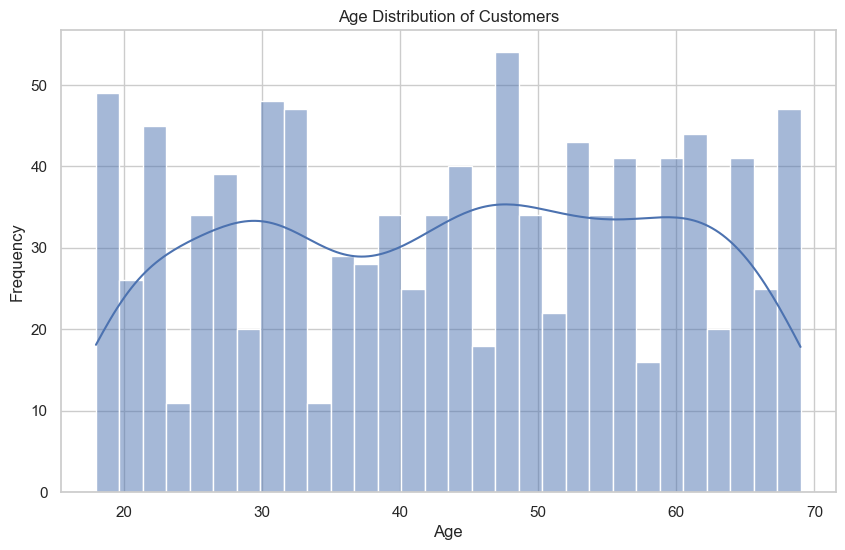

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Income distribution

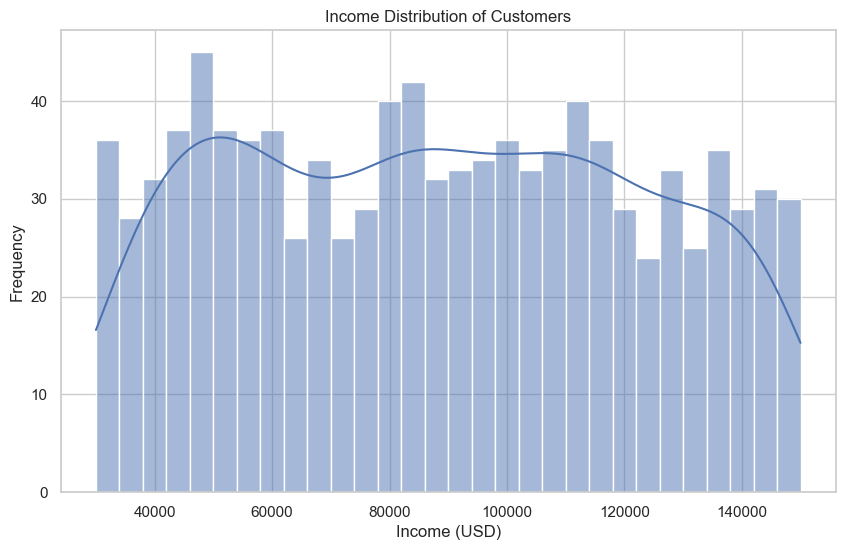

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['income'], bins=30, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()


### Spending score distribution

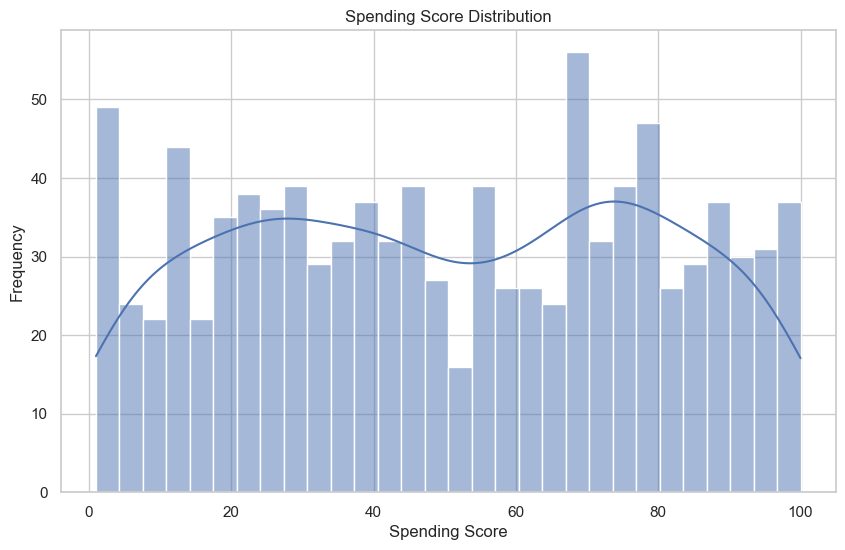

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['spending_score'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()


### Purchase frequency distribution

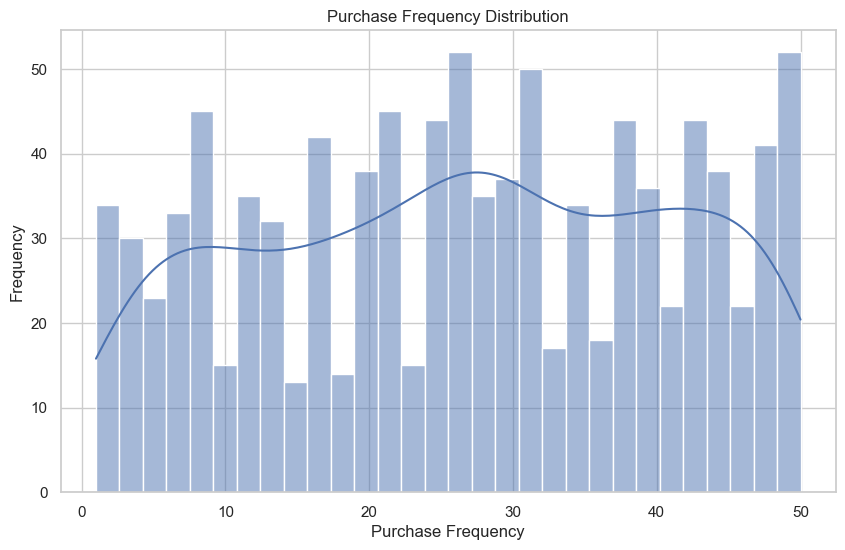

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['purchase_frequency'], bins=30, kde=True)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()


### Correlation heatmap

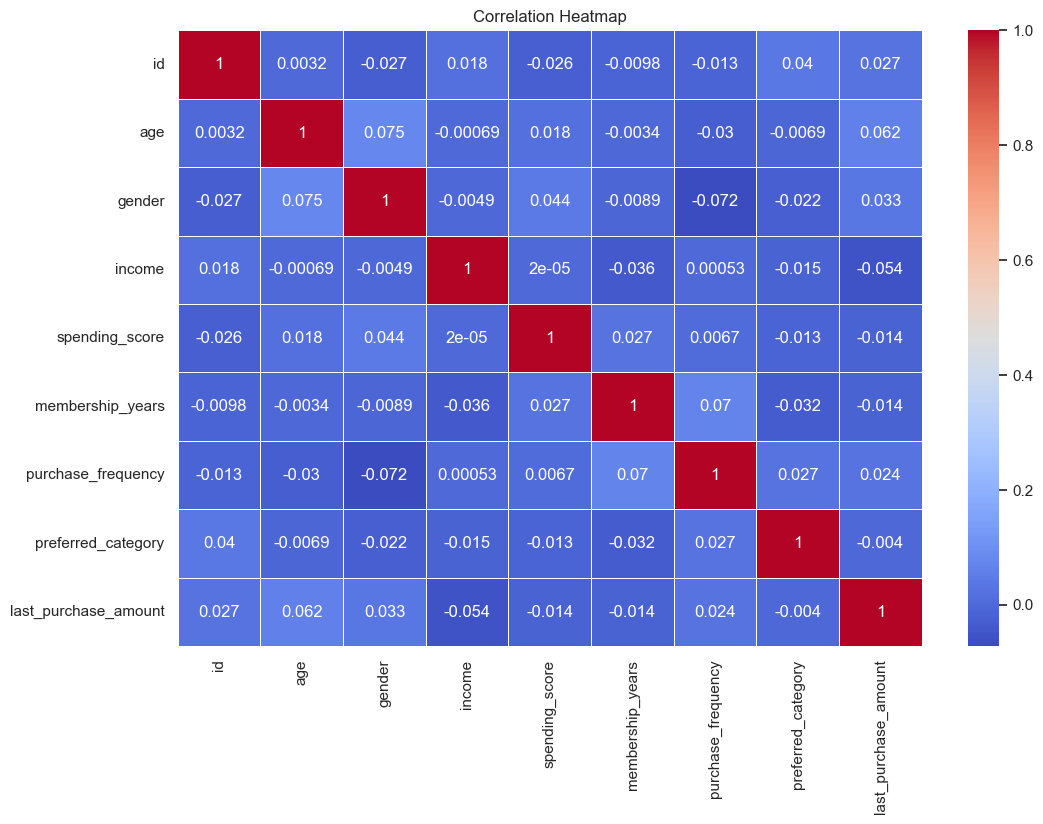

In [7]:
plt.figure(figsize=(12, 8))
correlation = customer_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Clustering Analysis

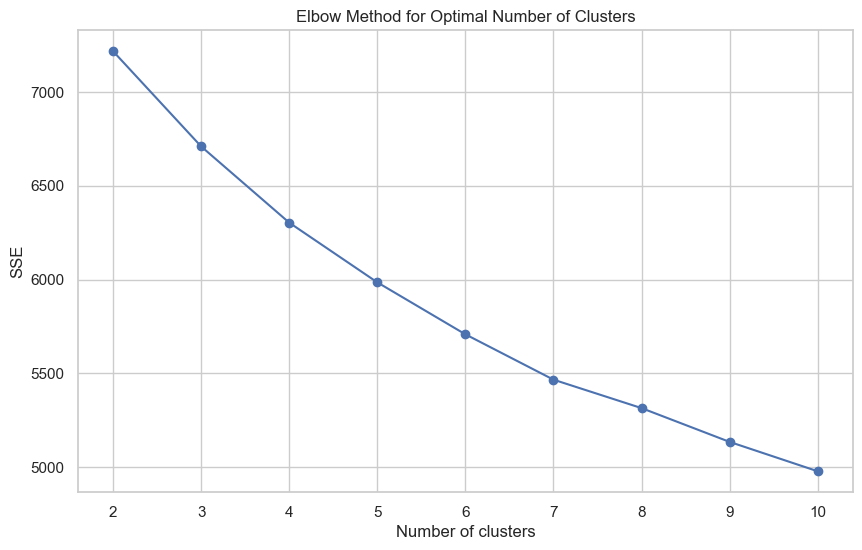

Silhouette Score: 0.09215660779033377


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['id']))

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, customer_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


## Segment Profiling

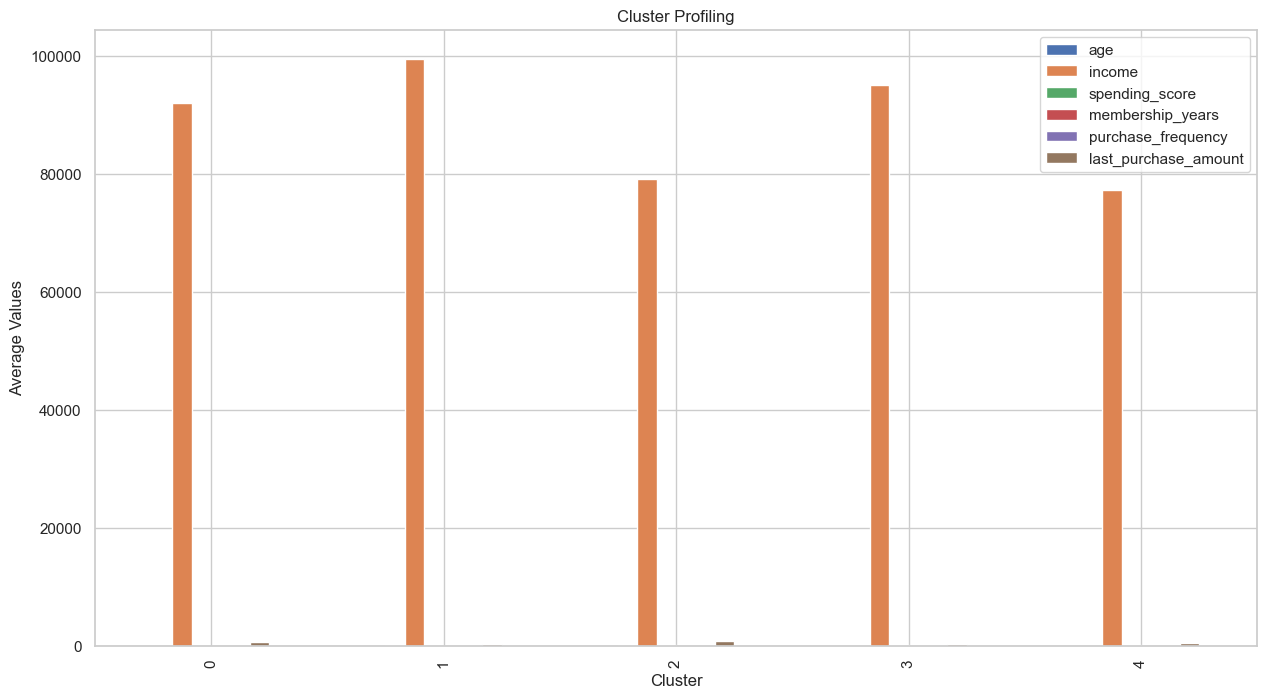

In [9]:

cluster_profile = customer_data.groupby('cluster').mean()
cluster_profile['count'] = customer_data['cluster'].value_counts()
cluster_profile

cluster_profile[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].plot(kind='bar', figsize=(15, 8))
plt.title('Cluster Profiling')
plt.xlabel('Cluster')
plt.ylabel('Average Values')
plt.legend(loc='best')
plt.show()



## Recommendations

Based on the clustering analysis and segment profiling, here are some recommendations for targeted marketing strategies:

1. **Cluster 0**: High spenders with high loyalty.
   - Offer premium membership plans with exclusive benefits.
   - Personalized recommendations and premium product offerings.

2. **Cluster 1**: Young customers with moderate income and spending scores.
   - Target with affordable product options and student discounts.
   - Promote referral programs to increase membership duration.

3. **Cluster 2**: Older customers with high income but lower spending scores.
   - Highlight the value and quality of products to encourage higher spending.
   - Provide incentives for frequent purchases.

4. **Cluster 3**: Customers with moderate income and spending scores across various age groups.
   - Focus on cross-selling and upselling strategies.
   - Offer loyalty rewards for repeated purchases.

5. **Cluster 4**: Customers with low spending scores and purchase frequency.
   - Engage with personalized communication and offers.
   - Identify barriers to spending and address them through surveys and feedback.

These strategies can help in enhancing customer satisfaction and driving sales growth through targeted marketing efforts.
